# Class 2: Handling Data with Python Data Structures (+ CSV I/O)

### Overview

If Class 1 taught Python to crunch numbers, Class 2 teaches it to **organize** information. Lists, tuples, sets, and dictionaries are like lab drawers: each holds different kinds of parts, and using the right drawer makes your experiments smoother. We’ll also read a simple **CSV** (voltage vs. time), compute basic stats, and visualize a tiny plot.

---

### Lecture Notes (quick, teachable bites)

* **List**: ordered, mutable. Use for sequences of readings.
* **Tuple**: ordered, immutable. Use for fixed-size records (e.g., `(time, voltage)`).
* **Set**: unique elements only. Use for deduplicating sensor IDs or tags.
* **Dict**: key→value map. Use for labeled data like `{"t": 0.1, "V": 3.3}` or config.
* **File I/O**: `open()`, `read()`, `write()`, and the `csv` module to parse files.

**Mini-analogy**

* List = a timeline of sensor readings
* Tuple = a single reading snapshot `(t, V)`
* Set = the unique types of sensors present
* Dict = a labeled measurement or config

---



## **1️⃣ List — “A sequence like a train of data”**

**Concept:**
A **List** is an *ordered, mutable* collection — it remembers the order of data, and you can add, remove, or change items.

**Bangla analogy:**
ভাবো একটা ট্রেন চলছে। প্রতিটা বগিতে একটা ডেটা রাখা আছে — `[3.3, 3.4, 3.5]`
তুমি চাইলে নতুন বগি যোগ করতে পারো (`append()`), পুরোনোটা বাদ দিতে পারো (`remove()`), এমনকি ভেতরের ডেটাও পাল্টাতে পারো (`list[0] = 3.2`)।

**Example:**

In [25]:
readings = [3.3, 3.4, 3.5]
readings.append(3.6)
print(readings)

[3.3, 3.4, 3.5, 3.6]


**When to use:** যখন ডেটা সময় অনুযায়ী বা ক্রম অনুযায়ী রাখতে হবে — যেমন sensor readings, temperature records, বা daily sales।

---



## **2️⃣ Tuple — “Sealed container — can’t be changed”**

**Concept:**
A **Tuple** is *ordered but immutable*. Once you pack data into it, you can’t modify it.

**Bangla analogy:**
একটা sealed টেস্ট টিউবের মতো — `(time, voltage)` ঢুকিয়ে ফেললে, পরে খুলে পরিবর্তন করা যাবে না।
কিন্তু তুমি এমন অনেক টিউব রাখতে পারো একটা তালিকায়।

**Example:**



In [26]:
reading = (0.1, 3.3)
data = [(0.1, 3.3), (0.2, 3.4), (0.3, 3.6)]

for t, v in data:
    print(f"At {t}s: {v}V")

At 0.1s: 3.3V
At 0.2s: 3.4V
At 0.3s: 3.6V



**When to use:** যখন ডেটা fix — যেমন `(latitude, longitude)`, `(time, voltage)`, বা `(roll, name)`।

---


## **3️⃣ Set — “No duplicates allowed”**

**Concept:**
A **Set** is an *unordered* collection that only keeps *unique* items.

**Bangla analogy:**
একটা মেলায় ঢোকার সময় যদি একই নামের দুইজন থাকে, gatekeeper একবারই নামটা লিখবে — duplicates বাদ।
অর্থাৎ, `{A1, A2, A3}` — দ্বিতীয়বার A2 দিলে কাজ হবে না।

**Example:**



In [27]:
sensor_ids = {"A1", "A2", "A3"}
sensor_ids.add("A2")  # ignored, already exists
print(sensor_ids)

{'A2', 'A3', 'A1'}


**When to use:** যখন ইউনিক ডেটা দরকার — যেমন ইউনিক sensor IDs, student roll numbers, বা unique device tags।

**Demo idea:**
Faulty sensors বাদ দিয়ে working sensors বের করা:


In [28]:
all_sensors = {"A1", "A2", "A3", "A4"}
faulty_sensors = {"A2", "A4"}
working = all_sensors - faulty_sensors
print("Working:", working)

Working: {'A3', 'A1'}


## **4️⃣ Dictionary — “Like a labeled box or a config file”**

**Concept:**
A **Dict (Dictionary)** is a *key–value* storage.
Every key is like a label on a drawer, and each value is what’s inside.

**Bangla analogy:**
ভাবো তোমার টুলবক্সে লেখা আছে:
“screwdriver → drawer 1”, “hammer → drawer 2”, “pliers → drawer 3”
তুমি label (key) দিয়ে যেটা দরকার সেটা তাড়াতাড়ি পেয়ে যাও।

**Example:**


In [29]:
config = {"sampling_rate": 100, "voltage_limit": 5.0}
print(config["sampling_rate"])
config["voltage_limit"] = 3.3

100


**When to use:** যখন ডেটা labeled বা structured — যেমন sensor configuration, student info, বা CSV থেকে column-wise data।

**Another example:**

In [30]:
readings = {"t": [0.1, 0.2, 0.3], "V": [3.3, 3.4, 3.6]}
print("Average voltage:", sum(readings["V"])/len(readings["V"]))

Average voltage: 3.433333333333333



## **5️⃣ CSV File I/O — “Reading data from the real world”**

**Concept:**
A **CSV file** is like an Excel sheet — প্রতিটা লাইন একটা record, কমা দিয়ে আলাদা করা।

Example data file:

```
time,voltage
0.1,3.3
0.2,3.4
0.3,3.6
0.4,3.5
0.5,3.4
```

**Reading with the csv module:**



In [31]:
import csv

times, voltages = [], []

with open("data.csv", newline='') as f:
    reader = csv.reader(f)
    header = next(reader, None)  # safely skip header if present
    for row in reader:
        if len(row) < 2:  # skip empty or malformed rows
            continue
        t, v = row
        times.append(float(t))
        voltages.append(float(v))

if voltages:
    print("Average voltage:", sum(voltages)/len(voltages))
else:
    print("No data found in CSV file!")


Average voltage: 3.44


**Visualizing with matplotlib:**

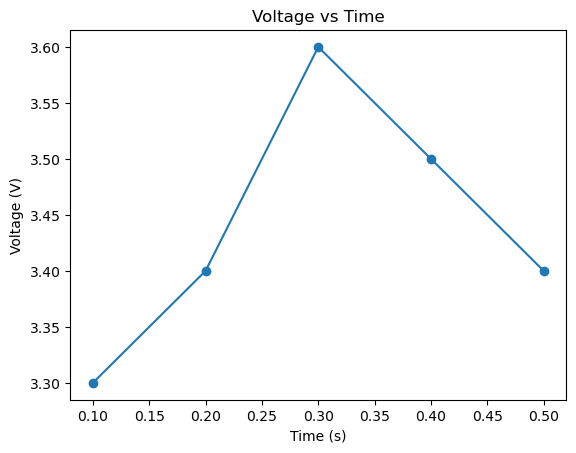

In [32]:
import matplotlib.pyplot as plt

plt.plot(times, voltages, marker='o')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time")
plt.show()

---


## **🧩 Practice Activity**

1. Read `voltage_time.csv`
2. Store data as **list of tuples** `(t, V)`
3. Create a **set** of unique voltage values
4. Convert it to a **dictionary** with keys `time` and `voltage`
5. Plot the graph and calculate `max`, `min`, and `average`


### 🧩 **Python Core Data Structures Comparison Table**

| Feature / Type            | **List**                                                 | **Tuple**                                        | **Set**                                           | **Dictionary (Dict)**                                        |
| ------------------------- | -------------------------------------------------------- | ------------------------------------------------ | ------------------------------------------------- | ------------------------------------------------------------ |
| **Definition**            | Ordered, mutable collection of elements                  | Ordered, immutable collection of elements        | Unordered collection of unique elements           | Unordered collection of *key–value* pairs                    |
| **Syntax Example**        | `my_list = [1, 2, 3]`                                    | `my_tuple = (1, 2, 3)`                           | `my_set = {1, 2, 3}`                              | `my_dict = {"a": 1, "b": 2}`                                 |
| **Order Maintained?**     | ✅ Yes                                                    | ✅ Yes                                            | ❌ No (random order)                               | ✅ Yes (Python 3.7+)                                          |
| **Mutable (Can Change)?** | ✅ Yes                                                    | ❌ No                                             | ✅ Yes (but unique only)                           | ✅ Yes                                                        |
| **Allows Duplicates?**    | ✅ Yes                                                    | ✅ Yes                                            | ❌ No                                              | ❌ Keys must be unique                                        |
| **Access Method**         | By *index* → `list[0]`                                   | By *index* → `tuple[0]`                          | By *iteration* → `for x in set`                   | By *key* → `dict["key"]`                                     |
| **Common Uses**           | Storing ordered data (sensor readings, marks list, etc.) | Fixed data groups (time, voltage pairs)          | Deduplication, membership tests                   | Labeled data (student info, configurations)                  |
| **Performance Note**      | Slightly slower than tuple (because mutable)             | Faster than list (because immutable)             | Very fast membership checks (`in`)                | Fast key lookups using hashing                               |
| **Methods**               | `append()`, `remove()`, `sort()`, `reverse()`            | None (cannot modify)                             | `add()`, `remove()`, `union()`, `intersection()`  | `keys()`, `values()`, `items()`, `update()`                  |
| **Bangla Analogy**        | 🚆 Train — ordered compartments you can rearrange        | 🧪 Sealed test tube — fixed sample, can’t reopen | 🎟️ Entry gate list — keeps one ticket per person | 🗂️ Toolbox with labeled drawers (key = label, value = item) |
| **When to Use**           | When order matters and data can change                   | When data must stay constant                     | When only unique items are needed                 | When data is labeled and you need quick lookup               |
| **Example Use Case**      | `[3.3, 3.4, 3.5]` for voltage readings                   | `(0.1, 3.3)` as one fixed record                 | `{A1, A2, A3}` for unique sensors                 | `{"t": [0.1,0.2], "V": [3.3,3.4]}` for structured data       |

---



### 1) Lists, Tuples, Sets, Dicts — EE-flavored

```python

```


In [33]:
# Lists: ordered, mutable
voltages = [3.1, 3.3, 3.2, 3.4, 3.3]
times = [0, 1, 2, 3, 4]  # seconds
print("First voltage:", voltages[0])
voltages.append(3.5)
print("After append:", voltages)

First voltage: 3.1
After append: [3.1, 3.3, 3.2, 3.4, 3.3, 3.5]


In [34]:
# Tuples: ordered, immutable (good for records)
reading = (times[0], voltages[0])  # (time, voltage)
print("A single reading tuple:", reading)

A single reading tuple: (0, 3.1)


In [35]:
# Sets: unique collection (deduplicate)
sensor_ids = ["A1", "A2", "A2", "A3", "A1"]
unique_sensors = set(sensor_ids)
print("Unique sensors:", unique_sensors)


Unique sensors: {'A2', 'A3', 'A1'}


In [36]:
# Dicts: key-value mapping (label your data)
config = {"sample_rate_hz": 100, "sensor": "A1", "location": "Bench-1"}
print("Config sample rate:", config["sample_rate_hz"])


Config sample rate: 100


In [37]:
# List of dicts: structured rows
rows = [
    {"t": 0, "V": 3.1},
    {"t": 1, "V": 3.3},
    {"t": 2, "V": 3.2},
]
print("Row 2 voltage:", rows[1]["V"])

Row 2 voltage: 3.3


### 2) Reading a CSV (voltage vs time) with the csv module


In [38]:
# We'll create a small CSV file, then read it.
import csv

# Create a demo CSV in runtime (Colab friendly)
with open("voltage_time.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["time_s", "voltage_v"])
    writer.writerow([0, 3.10])
    writer.writerow([1, 3.30])
    writer.writerow([2, 3.20])
    writer.writerow([3, 3.40])
    writer.writerow([4, 3.30])


In [39]:
# Read the CSV
times, volts = [], []
with open("voltage_time.csv", "r") as f:
    reader = csv.DictReader(f)
    for row in reader:
        times.append(float(row["time_s"]))
        volts.append(float(row["voltage_v"]))

print("Times:", times)
print("Voltages:", volts)

Times: [0.0, 1.0, 2.0, 3.0, 4.0]
Voltages: [3.1, 3.3, 3.2, 3.4, 3.3]


### 3) Simple stats + tiny plot


In [40]:
# Basic statistics
avg_v = sum(volts) / len(volts)
v_min = min(volts)
v_max = max(volts)
print(f"Avg V = {avg_v:.3f}  |  Min V = {v_min:.3f}  |  Max V = {v_max:.3f}")

Avg V = 3.260  |  Min V = 3.100  |  Max V = 3.400


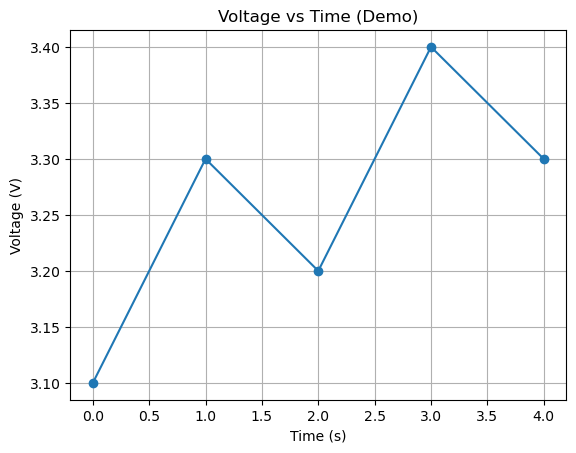

In [41]:

# Quick line plot (preview; full viz comes in Class 4)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(times, volts, marker="o")
plt.title("Voltage vs Time (Demo)")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.show()

## Classworks (5) — Skeleton Code (students fill the blanks)


### Classwork 1: List Ops + Indexing

In [42]:
# =========================================
# CLASSWORK 1: LIST OPERATIONS + INDEXING
# =========================================
# Task:
# 1) Create a list named 'readings' with 5 voltage values (floats).
# 2) Print the first and last elements by index.
# 3) Append a new value and print the updated list.
# 4) Replace the 3rd element with a new value.

# readings = [???, ???, ???, ???, ???]
# print("First element:", ???)
# print("Last element:", ???)
# readings.???(???)  # append a new value
# readings[??] = ??? # replace the 3rd element (index 2)
# print("Updated readings:", readings)

### Classwork 2: Tuple + Dict Records



In [43]:
# =========================================
# CLASSWORK 2: TUPLE + DICT RECORDS
# =========================================
# Task:
# 1) Create a tuple called 'sample' representing one reading: (time_s, voltage_v).
# 2) Create a dict called 'row' with keys 't' and 'V' from that tuple.
# 3) Print them both, showing how to access the voltage value in each.

# sample = (???, ???)  # e.g., (0.5, 3.25)
# row = {"t": ???, "V": ???}
# print("Tuple voltage:", sample[??])
# print("Dict voltage:", row[???])

### Classwork 3: Sets for Uniqueness


In [44]:
# =========================================
# CLASSWORK 3: SETS FOR UNIQUENESS
# =========================================
# Task:
# Given a list of sensor IDs with duplicates, create a set to find unique IDs.
# Then convert the set back to a sorted list.

# sensors = ["S1", "S2", "S1", "S3", "S2", "S4", "S3"]
# unique_set = set(???)          # fill in
# unique_sorted = sorted(list(???))  # fill in
# print("Unique sorted sensors:", unique_sorted)

### Classwork 4: CSV Read + Basic Stats


In [45]:
# =========================================
# CLASSWORK 4: CSV READ + BASIC STATS
# =========================================
# Task:
# 1) Create (or reuse) a CSV file named 'vt_small.csv' with columns: time_s, voltage_v.
#    Add at least 5 rows.
# 2) Read it with csv.DictReader and store values in lists 't' and 'v'.
# 3) Compute average voltage and print it.

import csv

# Step 1: Create the CSV file
# with open("vt_small.csv", "w", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerow(["time_s", "voltage_v"])
#     # Write at least 5 rows of (time, voltage)
#     # writer.writerow([???, ???])

# Step 2: Read the CSV into lists
# t, v = [], []
# with open("vt_small.csv", "r") as f:
#     reader = csv.DictReader(f)
#     for row in reader:
#         t.append(???)  # convert to float
#         v.append(???)  # convert to float

# Step 3: Compute average voltage
# avg_v = ??? / ???  # sum(v) / len(v)
# print("Average voltage:", round(avg_v, 3))

### Classwork 5: Dict of Lists vs List of Dicts


In [46]:
# =====================================================
# CLASSWORK 5: DICT OF LISTS vs LIST OF DICTS (CHOICE)
# =====================================================
# Task:
# You will build the same dataset in two structures and access a value from each.
# A) Dict of Lists: {"t": [...], "V": [...]}
# B) List of Dicts: [{"t": t0, "V": v0}, {"t": t1, "V": v1}, ...]

# A) Dict of Lists
# data_cols = {"t": [0, 1, 2], "V": [3.10, 3.25, 3.20]}
# # Print the voltage at index 1 from this structure:
# print("A) V at index 1:", ???)

# B) List of Dicts
# data_rows = [{"t": 0, "V": 3.10}, {"t": 1, "V": 3.25}, {"t": 2, "V": 3.20}]
# # Print the voltage from the second row:
# print("B) V from row 2:", ???)

### Wrap-up / Homework Challenge

* Extend **Classwork 4** to also compute **min** and **max** voltage, and print a small summary line:
  `Summary: n=<count>, mean=<...>, min=<...>, max=<...>`
* Bonus: Save your summary to a new text file `summary.txt` using `open("summary.txt", "w")`.

